# Worksheet 12

Name:  Yibo Ye
UID: U76576018

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

<br>1. yes, it's a classification
<br>2. no
<br>3. yes
<br>4. no

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

collect and preprocess dataset, split data to different groups for different purposes: training, validation, and testing. Training data can be used to help construct the model. The validation data can be used to refine the model, and the testing data are used to evaluate the model's generalization performance.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Underfitting is when the model does not fit much data in the tests while overfitting makes the model so complex to fit as much data as it can.

### K Nearest Neighbors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

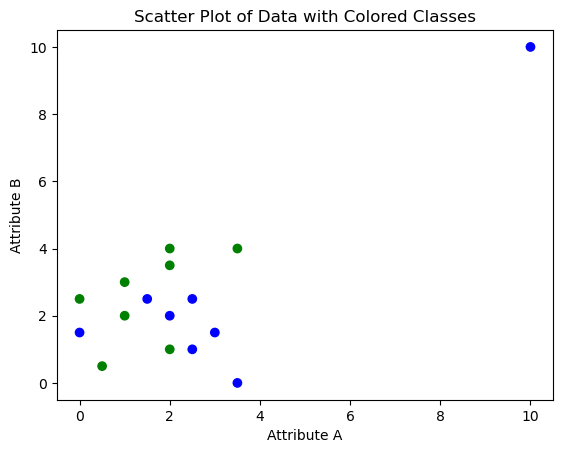

In [2]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.xlabel("Attribute A")
plt.ylabel("Attribute B")
plt.title("Scatter Plot of Data with Colored Classes")
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

<br>Attribute A: [10]
<br>Attribute B: [10]
<br>Class: [0]

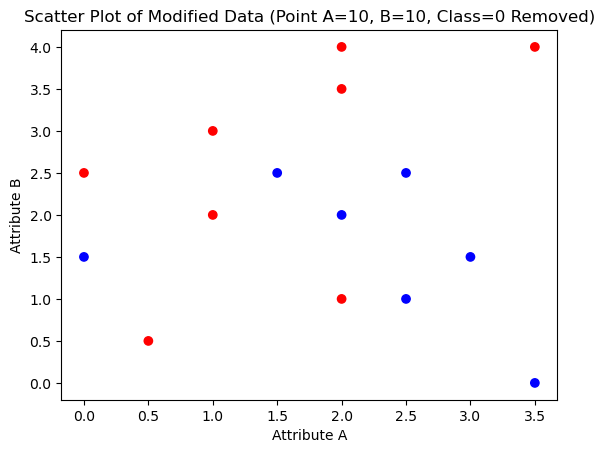

In [10]:
# Create a copy of the original dataset
data_copy = data.copy()

# Define the values of the point to be removed
value_to_remove = (10, 10, 0)

# Find the index of the point to be removed
index_to_remove = None
for i, (a, b, c) in enumerate(zip(data_copy["Attribute A"], data_copy["Attribute B"], data_copy["Class"])):
    if (a, b, c) == value_to_remove:
        index_to_remove = i
        break

# Remove the point at the found index
if index_to_remove is not None:
    data_copy["Attribute A"].pop(index_to_remove)
    data_copy["Attribute B"].pop(index_to_remove)
    data_copy["Class"].pop(index_to_remove)
    
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of the modified dataset
colors = np.array(['b', 'r', 'g'])  # Define colors for each class
plt.scatter(data_copy["Attribute A"], data_copy["Attribute B"], c=colors[data_copy["Class"]])

plt.xlabel("Attribute A")
plt.ylabel("Attribute B")
plt.title("Scatter Plot of Modified Data (Point A=10, B=10, Class=0 Removed)")

plt.show()

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

yes

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

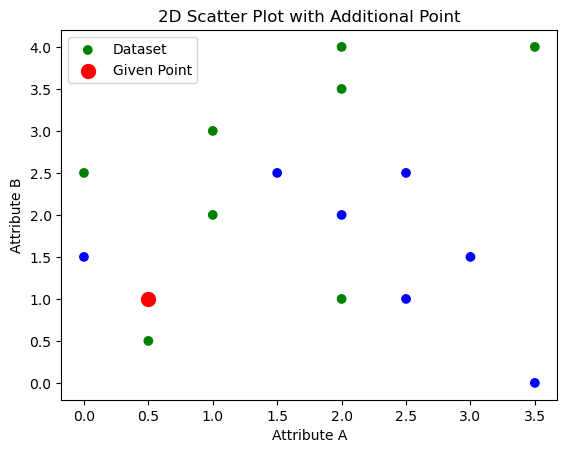

In [11]:
import matplotlib.pyplot as plt

# Existing dataset
attribute_A = data["Attribute A"]
attribute_B = data["Attribute B"]
colors = np.array([x for x in 'bgrcmyk'])

# Scatter plot for the dataset
plt.scatter(attribute_A, attribute_B, color=colors[data["Class"]].tolist(), label='Dataset')
plt.xlabel("Attribute A")
plt.ylabel("Attribute B")
plt.title("2D Scatter Plot with Additional Point")

# Plotting the given point in red
plt.scatter(0.5, 1, color='r', label='Given Point', s=100)  # s=100 to make the point slightly larger

plt.legend()
plt.show()


e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(p1, p2):
    """Compute the Euclidean distance between two points."""
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

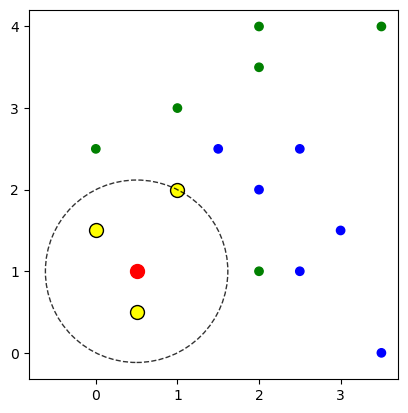

In [14]:
def n_closest_to(example, n):
    """
    Returns the indices of the n closest points to the example point from the dataset.
    """
    distances = [euclidean_distance(example, (x,y)) for x, y in zip(data["Attribute A"], data["Attribute B"])]
    return np.argsort(distances)[:n]

# Example point
example = (0.5, 1)

# Getting the indices of the 3 closest points
closest_indices = n_closest_to(example, 3)

# Extracting the coordinates of the 3 closest points
closest_points_x = np.array(data["Attribute A"])[closest_indices]
closest_points_y = np.array(data["Attribute B"])[closest_indices]

# Location of the example point
location = example

# Radius for the circle = distance to the 3rd closest point
radius = euclidean_distance(example, (closest_points_x[2], closest_points_y[2]))

# Plotting
_, axes = plt.subplots()
axes.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
axes.scatter(example[0], example[1], color='r', s=100)  # Given point in red
axes.scatter(closest_points_x, closest_points_y, color='yellow', s=100, edgecolors='black')  # 3 closest points in yellow

# Drawing the circle
cir = plt.Circle(location, radius, fill=False, alpha=0.8, linestyle='--')
axes.add_patch(cir)

axes.set_aspect('equal')  # necessary so that the circle is not oval
plt.show()

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [15]:
def majority(points):
    classes = np.array(data["Class"])[points]
    counts = np.bincount(classes)
    if len(counts) == 1:  # all three points belong to class 0
        return 0
    elif counts[0] >= 2:  # majority or tie (default to 0)
        return 0
    else:  # majority belongs to class 1
        return 1
assigned_class = majority(closest_indices)
print(f"The class assigned to the point {example} is: {assigned_class}")

The class assigned to the point (0.5, 1) is: 1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [16]:
def n_closest_to_except_one(example, n, exception_index):
    """
    Returns the indices of the n closest points to the example point from the dataset, excluding a specific index.
    """
    distances = [euclidean_distance(example, (x,y)) if idx != exception_index else float('inf') for idx, (x, y) in enumerate(zip(data["Attribute A"], data["Attribute B"]))]
    return np.argsort(distances)[:n]

count = 0
for i in range(len(data["Attribute A"])):
    actual_class = data["Class"][i]
    
    # Extract the i-th point from the dataset to be considered as the test point
    test_point = (data["Attribute A"][i], data["Attribute B"][i])
    
    # Get the 3 closest points from the training set (excluding the current test point)
    closest_indices = n_closest_to_except_one(test_point, 3, i)
    
    # Predict the class of the test point based on the majority class of its 3 closest neighbors in the training set
    prediction = majority(closest_indices)
    
    if prediction == actual_class:
        count += 1

# Compute the overall accuracy
accuracy = count / len(data["Attribute A"])
print(f"Overall accuracy = {accuracy:.2f}")


Overall accuracy = 0.73
